#                            Аналіз показників компанії Yulu

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/yulu_rental.csv')
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Питання 1. А які пікові години оренди велосипедів? 
Щоб проаналізувати це питання, побудуємо стовпчасту діаграму, яка відображатиме кількість орендованих велосипедів протягом кожної години доби.

In [14]:
df['datetime'] = pd.to_datetime(df.datetime)
df['hour'] = df['datetime'].dt.hour
peak_hours_df = df[['hour', 'count']].groupby('hour').sum()

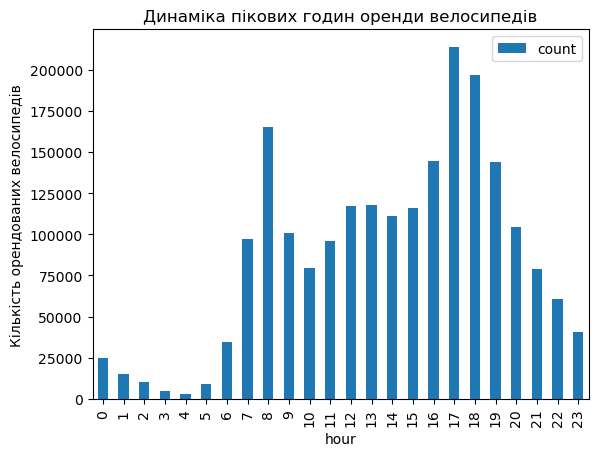

In [18]:
peak_hours_df.plot.bar()
plt.title('Динаміка пікових годин оренди велосипедів')
plt.ylabel('Кількість орендованих велосипедів');

### Висновок: 
Згідно зі стовпчастою діаграмою, можна побачити, що пікові години оренди велосипедів припадають на 8:00 — коли люди прямують на роботу, до школи чи університету, та на 18:00–19:00 — коли клієнти повертаються з роботи. Логічним рішенням було б збільшити кількість велосипедів на станціях у ці години в робочі дні, щоб більше людей могли скористатися послугою для доїзду до своїх пунктів призначення.

### Питання 2. Як відбувається розподіл кількості орендованих велосипедів по сезонам?
Для цього побудуємо діаграму "ящик з вусами" для дослідження.

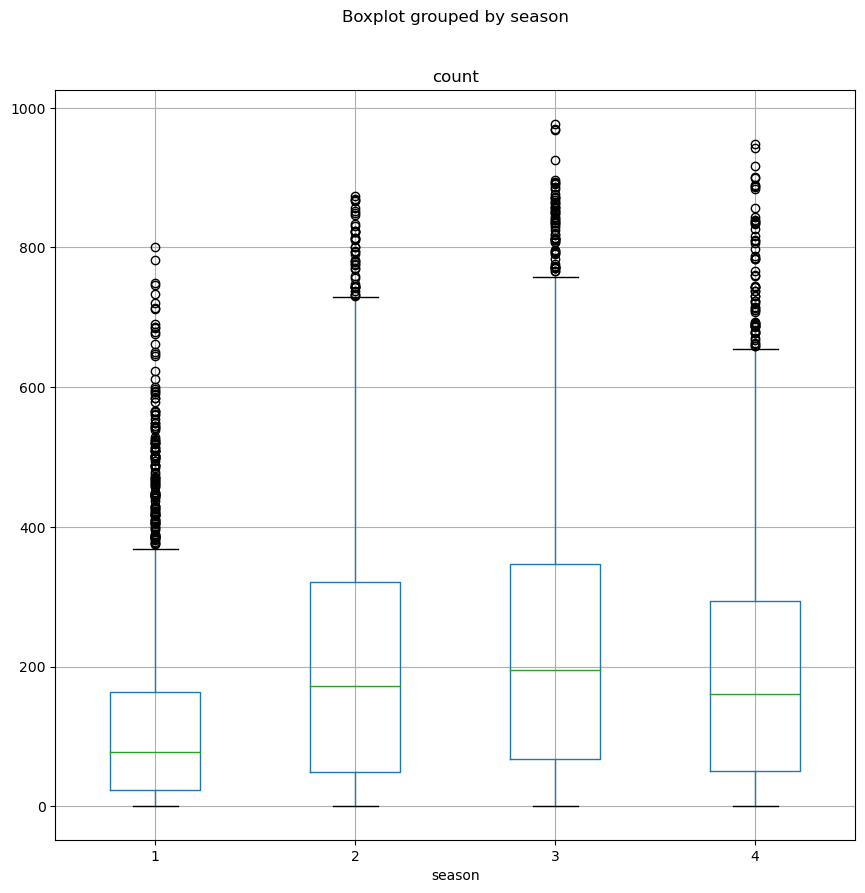

In [25]:
df.boxplot('count', by = 'season', figsize = (10,10));

За допомогою боксплоту можемо дослідити розподіл кількості орендованих велосипедів протягом чотирьох сезонів.

Сезон 1 (весна): Медіана кількості орендованих велосипедів приблизно 100. Це найнижчий показник серед усіх сезонів. Розподіл значень досить широкий, і є багато виняткових значень, що свідчить про випадкові сплески оренди.

Сезон 2 (літо): Медіана піднімається приблизно до 200. Розподіл стає ширшим, і кількість оренд збільшується. Є кілька виняткових значень, але їх менше, ніж у весняний період.

Сезон 3 (осінь): Медіана також знаходиться на рівні близько 200, що свідчить про високий рівень оренди велосипедів, хоча і не найвищий. Це показує, що осінь залишається одним з активних періодів для оренди.

Сезон 4 (зима): Медіана близька до 150. Незважаючи на зниження температури, рівень оренди залишається досить високим, хоча меншим порівняно з літом та осінню. Розподіл не такий широкий, але все ще має декілька аномальних точок.

Таким чином, найбільш активним сезоном для оренди велосипедів є літо та осінь, а найменш активним — весна.

#### Висновки:
Літо (сезон 2) є найбільш активним періодом для оренди велосипедів, що може бути пов'язано з теплішою погодою та сприятливими умовами для їзди.
Весна(сезон 1) є найменш активним сезоном для оренди велосипедів, але має деякі періоди з підвищеним попитом, що відображено у вигляді аномальних точок на графіку.
У всіх сезонах видно значну кількість аномальних точок, які можуть свідчити про дні з різким збільшенням попиту на велосипеди.

### Цікаво дослідити аномальні значення. 
Аутлаєри — це значення, які виходять за межі "нормального" розподілу даних. За допомогою IQR(Interquartile Range) ми можемо визначити порогові значення, за якими дані вважаються аутлаєрами.

Нижня межа=Q1−1.5×IQR

Верхня межа=Q3+1.5×IQR

Всі значення, які більші за цю межу, вважаються аутлаєрами зверху.

In [45]:
# Створюємо функцію для визначення аутлаєрів за допомогою IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

In [140]:
df['is_outlier'] = detect_outliers_iqr(df, 'count')

outliers_by_season = df[df['is_outlier']].groupby('season')['count'].count()

print(outliers_by_season)

season
1     16
2     99
3    116
4     69
Name: count, dtype: int64


In [137]:
outliers_by_weather = df[df['is_outlier']][['season', 'weather', 'temp', 'count']]
outliers_by_weather

,season,weather,temp,count
6611,1,2,24.60,712
6634,1,1,28.70,676
6635,1,1,28.70,734
6649,1,1,18.04,662
6658,1,1,28.70,782
...,...,...,...,...
10678,4,2,13.94,724
10702,4,2,10.66,688
10726,4,1,9.84,679
10846,4,1,15.58,662


In [138]:
import warnings
warnings.filterwarnings('ignore')

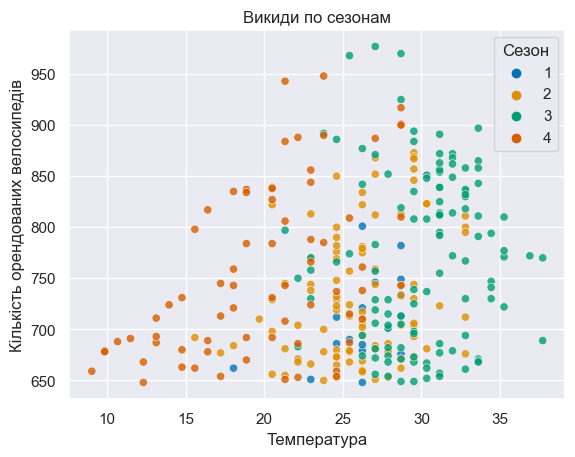

In [139]:
sns.set_theme()
sns.scatterplot(data = outliers_by_weather, x = 'temp', y = 'count', alpha =.8, palette = 'colorblind', hue = 'season')
plt.xlabel('Температура')
plt.ylabel('Кількість орендованих велосипедів')
plt.title('Викиди по сезонам')
plt.legend(title='Сезон');

Сезони - 1: весна, 2: літо, 3: осінь, 4: зима

### Висновки 
Аналіз аномальної кількості орендованих велосипедів за сезонами і температурами:

Весна: У весняний сезон спостерігається менша кількість аутлаєрів, що пов'язано з поступовим потеплінням. Температурний діапазон від 18 до 28 градусів Цельсія, коли люди лише починають більше проводити час на вулиці. Це може пояснювати меншу кількість аномальних оренд, оскільки сезон ще не досяг свого піку в частоті використання велосипедів.

Літо: Найбільше аутлаєрів спостерігається при температурі близько 25 градусів Цельсія. У цей період не надто спекотно, що заохочує людей проводити час на вулиці, але це може також свідчити про підвищений попит на оренду велосипедів у комфортних погодних умовах.

Осінь: Осінню аномальні оренди велосипедів зростають при температурах від 25 до 40 градусів Цельсія. Це може бути результатом останніх теплих днів, коли клієнти прагнуть насолодитися останніми можливостями для активного відпочинку на свіжому повітрі перед початком холоднішого сезону.

Зима: Взимку аномалії в орендах велосипедів спостерігаються при температурах від 9 до 25 градусів Цельсія. Цей температурний режим для зимового сезону є незвичним і може бути викликаний або нетиповими теплими днями, або можливими помилками в записах даних. Важливо перевірити, чи дійсно мали місце такі аномалії або чи є можливість некоректного введення даних.

### Питання 3. Чи впливає швидкість вітру на кількість орендованих велосипедів і який відсоток користувачів з тої кількості є зареєстрованими, а який - неформальними? 

In [109]:
count_by_windspeed = df[['windspeed', 'count', 'registered', 'casual']]
grouped_by_windspeed = count_by_windspeed.groupby('windspeed')['count'].sum().reset_index()
grouped_by_windspeed

,windspeed,count
0,0.0000,211526
1,6.0032,128938
2,7.0015,175627
3,8.9981,196723
4,11.0014,213791
5,12.9980,210744
6,15.0013,202611
7,16.9979,177034
8,19.0012,147403
9,19.9995,110816


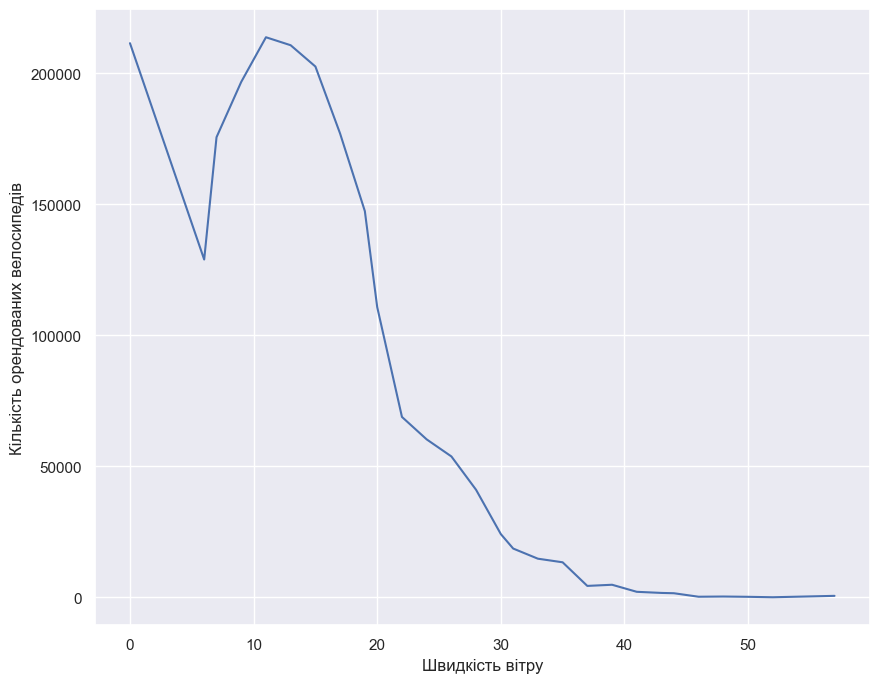

In [114]:
plt.figure(figsize = (10,8))
plt.plot(grouped_by_windspeed['windspeed'],grouped_by_windspeed['count'])
plt.xlabel('Швидкість вітру')
plt.ylabel('Кількість орендованих велосипедів');

Бачимо що при збільшені швидкості вітру, кількість орендованих велосипедів знижується. Подивимся чи є якась закономірність чи то зареєстровані коритувачи чи неформальні. 

In [119]:
grouped_by_windspeed = count_by_windspeed.groupby('windspeed').agg({
    'count': 'sum',
    'registered': 'sum',
    'casual': 'sum'
}).reset_index()

In [127]:
grouped_by_windspeed['registered_percentage'] = (grouped_by_windspeed['registered'] / grouped_by_windspeed['count']) * 100
grouped_by_windspeed['casual_percentage'] = (grouped_by_windspeed['casual'] / grouped_by_windspeed['count']) * 100

total_registered_percentage = grouped_by_windspeed['registered_percentage'].sum()
total_casual_percentage = grouped_by_windspeed['casual_percentage'].sum()

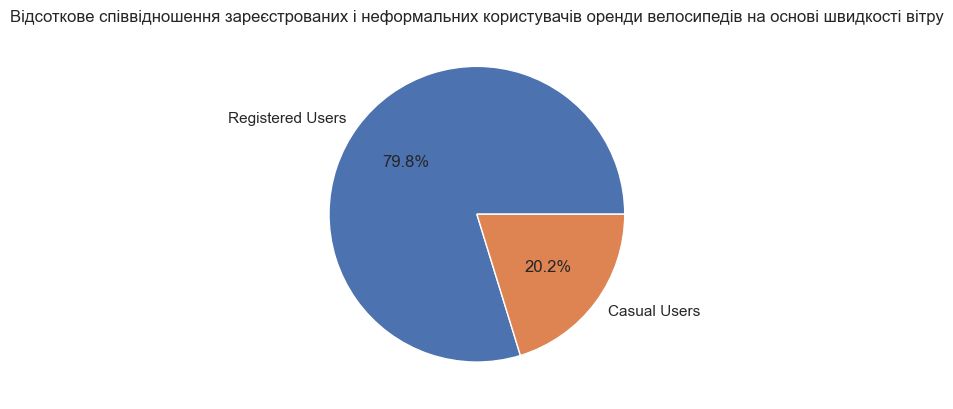

In [132]:
sizes = [total_registered_percentage, total_casual_percentage]
labels = ['Registered Users', 'Casual Users']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Відсоткове співвідношення зареєстрованих і неформальних користувачів оренди велосипедів на основі швидкості вітру');

### Висновок. 
Згідно з аналізом, з підвищенням швидкості вітру кількість орендованих велосипедів зменшується. Однак, переважну більшість орендарів складають зареєстровані користувачі, які становлять близько 80% від загальної кількості оренд. Це свідчить про те, що зареєстровані користувачі більш чутливі до змін швидкості вітру або мають тенденцію орендувати велосипеди навіть при несприятливих погодних умовах.